In [1]:
"""Image Recognition using OpenCV
-Eyes
-Face
-UpperBody
-Smile
"""
Imagename='Test.jpg'

In [2]:
import cv2
import matplotlib.pyplot as plt

In [3]:
face_cascade = cv2.CascadeClassifier('haarcascade_frontalface_default.xml')#Frontal Face
eye_cascade = cv2.CascadeClassifier('haarcascade_eye.xml')#Eyes
smile_cascade=cv2.CascadeClassifier('haarcascade_smile.xml')#Smile
full_cascade=cv2.CascadeClassifier('haarcascade_fullbody.xml')#Full Body
upper_cascade=cv2.CascadeClassifier('haarcascade_upperbody.xml')#Upper Body

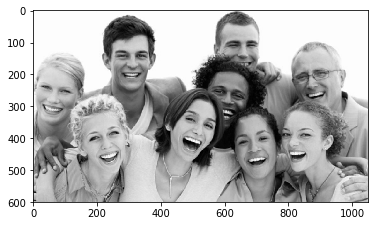

In [4]:
from PIL import Image
img = Image.open(Imagename).convert("L")
plt.imshow(img)
img.save('greyscale.jpg')
frame=cv2.imread('greyscale.jpg')
gray = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
#Note: Save Image as Test.jpg in same repo for processing or change Imagename

In [5]:
def detectFace_and_eyes_and_smile(gray, frame):
    
    faces = face_cascade.detectMultiScale(gray, 1.3, 5) 
    for (x, y, w, h) in faces:
        cv2.rectangle(frame, (x, y), (x+w, y+h), (255, 0, 0), 2)
        #Converting to grey 
        roi_gray = gray[y:y+h, x:x+w]
        roi_color = frame[y:y+h, x:x+w]
        #Detecting Eyes
        eyes = eye_cascade.detectMultiScale(roi_gray, 1.1, 3) 
        for (ex, ey, ew, eh) in eyes:
            cv2.rectangle(roi_color,(ex, ey),(ex+ew, ey+eh), (0, 255, 0), 2) 
        smile = smile_cascade.detectMultiScale(roi_gray, 1.1, 3) 
        for (sx, sy, sw, sh) in smile:
            cv2.rectangle(roi_color,(sx, sy),(sx+sw, sy+sh), (0, 255, 0), 2) 
    return frame

In [6]:
def detect_UpperBody(gray,frame):
    upper=upper_cascade.detectMultiScale(gray,1.1,5)
    for (x,y,w,h) in upper:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
    return frame

In [7]:
def detect_FullBody(gray,frame):
    upper=full_cascade.detectMultiScale(gray,1.1,5)
    for (x,y,w,h) in upper:
        cv2.rectangle(frame,(x,y),(x+w,y+h),(255,0,0),2)
        roi_gray=gray[y:y+h,x:x+w]
        roi_color=frame[y:y+h,x:x+w]
    return frame

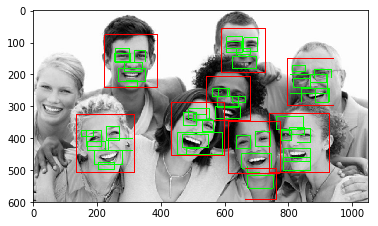

In [8]:
canvas = detectFace_and_eyes_and_smile(gray, frame)
#canvas=detect_FullBody(gray, frame)# Use this for Full Body recognition
#canvas=detect_UpperBody(gray,frame)#Use this for upperBody recognition
canvas
plt.imshow(canvas)